In [33]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [34]:
clean_allyears311df = gpd.read_file('clean_allyears311df.geojson')

<AxesSubplot:>

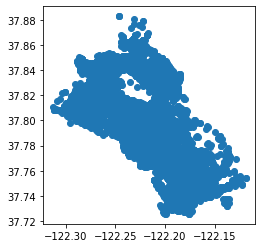

In [35]:
clean_allyears311df.plot()

In [36]:
clean_allyears311df

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,Year,x,y,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.838160,-122.251303,2019,-122.251303,37.838160,POINT (-122.25130 37.83816)
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,CCD1,15,37.850308,-122.225949,2019,-122.225949,37.850308,POINT (-122.22595 37.85031)
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,13,37.794280,-122.252180,2019,-122.252180,37.794280,POINT (-122.25218 37.79428)
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.807518,-122.178452,2019,-122.178452,37.807518,POINT (-122.17845 37.80752)
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.828107,-122.195666,2019,-122.195666,37.828107,POINT (-122.19567 37.82811)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,3353,37.746496,-122.202223,2012,-122.202223,37.746496,POINT (-122.20222 37.74650)
11172,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD5,3360,37.776080,-122.218851,2012,-122.218851,37.776080,POINT (-122.21885 37.77608)
11173,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD6,3387,37.778537,-122.175978,2012,-122.175978,37.778537,POINT (-122.17598 37.77854)
11174,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD3,3397,37.824268,-122.264544,2012,-122.264544,37.824268,POINT (-122.26454 37.82427)


In [37]:
no_open_allyears311df = clean_allyears311df[clean_allyears311df['Time to Close']!='Open']
no_open_allyears311df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8447 entries, 0 to 11175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        8447 non-null   object  
 1   DATETIMEINIT     8447 non-null   object  
 2   SOURCE           8447 non-null   object  
 3   DESCRIPTION      8447 non-null   object  
 4   REQCATEGORY      8447 non-null   object  
 5   STATUS           8447 non-null   object  
 6   COUNCILDISTRICT  8447 non-null   object  
 7   Time to Close    8447 non-null   object  
 8   LAT              8447 non-null   float64 
 9   LONG             8447 non-null   float64 
 10  Year             8447 non-null   int64   
 11  x                8447 non-null   float64 
 12  y                8447 non-null   float64 
 13  geometry         8447 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(8)
memory usage: 989.9+ KB


In [38]:
no_open_allyears311df['Time to Close'] = no_open_allyears311df['Time to Close'].astype(float)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [39]:
no_open_allyears311df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8447 entries, 0 to 11175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        8447 non-null   object  
 1   DATETIMEINIT     8447 non-null   object  
 2   SOURCE           8447 non-null   object  
 3   DESCRIPTION      8447 non-null   object  
 4   REQCATEGORY      8447 non-null   object  
 5   STATUS           8447 non-null   object  
 6   COUNCILDISTRICT  8447 non-null   object  
 7   Time to Close    8447 non-null   float64 
 8   LAT              8447 non-null   float64 
 9   LONG             8447 non-null   float64 
 10  Year             8447 non-null   int64   
 11  x                8447 non-null   float64 
 12  y                8447 non-null   float64 
 13  geometry         8447 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 989.9+ KB


In [40]:
no_open_allyears311df['x'] = no_open_allyears311df.geometry.x
no_open_allyears311df['y'] = no_open_allyears311df.geometry.y

In [41]:
from keplergl import KeplerGl

In [42]:
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [43]:
map.add_data(data=no_open_allyears311df,name='All Closed Requests')

In [44]:
incomemap = gpd.read_file('incomeblocksbasemap.geojson')

In [45]:
map.add_data(data=incomemap,name='Income Map')

In [46]:
racemap = gpd.read_file('race2019blocks.geojson')

In [47]:
map.add_data(data=racemap,name='Oakland Block Groups by Race')